<a href="https://colab.research.google.com/github/Kalaiselvan88/MLAssignments/blob/main/MLIAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
os.environ["PYSPARK_PYTHON"]="/home/ec2-user/spark-2.4.4-bin-hadoop2.7/python"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame

In [ ]:
# Create an app name
spark = SparkSession.builder.appName("ML1Assignment").getOrCreate()

In [ ]:
spark

## Fetch data

In [ ]:
# Fetch the files form AWS S3
credit_url = "https://s3.amazonaws.com/sqoop.oozie.ml/credit_record.csv"
application_url = "https://s3.amazonaws.com/sqoop.oozie.ml/application_record.csv"
from pyspark import SparkFiles
spark.sparkContext.addFile(credit_url)
spark.sparkContext.addFile(application_url)

df_credit_record = spark.read.csv("file://"+SparkFiles.get("credit_record.csv"), header=True, inferSchema= True)
df_application_record = spark.read.csv("file://"+SparkFiles.get("application_record.csv"), header=True, inferSchema= True)

## Perform EDA

In [ ]:
# Let us understand the columns in credit record
df_credit_record.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- STATUS: string (nullable = true)



In [ ]:
# Let us have a look at the data by converting it into a Pandas dataframe for better readability.
pd_credit_df = df_credit_record.toPandas()
pd_credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# We can see all 3 columns are nullable. Let us check the number of NULL values in each column.
from pyspark.sql.functions import *
df_credit_record.where(col("months_balance").isNull()).count()

0

In [ ]:
df_credit_record.where(col("status").isNull()).count()

0

In [ ]:
df_credit_record.where(col("id").isNull()).count()

0

In [ ]:
# let us view the values present in each column
df_credit_record.groupBy('months_balance').count().orderBy('count', ascending = 0).show(100)

+--------------+-----+
|months_balance|count|
+--------------+-----+
|            -1|34436|
|            -2|34209|
|             0|33856|
|            -3|33854|
|            -4|33365|
|            -5|32881|
|            -6|32296|
|            -7|31640|
|            -8|30884|
|            -9|30272|
|           -10|29671|
|           -11|29060|
|           -12|28439|
|           -13|27787|
|           -14|27117|
|           -15|26483|
|           -16|25867|
|           -17|25198|
|           -18|24425|
|           -19|23773|
|           -20|23163|
|           -21|22526|
|           -22|21928|
|           -23|21296|
|           -24|20617|
|           -25|19915|
|           -26|19251|
|           -27|18691|
|           -28|18034|
|           -29|17408|
|           -30|16799|
|           -31|16179|
|           -32|15589|
|           -33|14993|
|           -34|14401|
|           -35|13798|
|           -36|13174|
|           -37|12605|
|           -38|12023|
|           -39|11379|
|          

In [ ]:
df_credit_record.groupBy('status').count().orderBy('count', ascending = 0).show()

+------+------+
|status| count|
+------+------+
|     C|442031|
|     0|383120|
|     X|209230|
|     1| 11090|
|     5|  1693|
|     2|   868|
|     3|   320|
|     4|   223|
+------+------+



In [ ]:
df_credit_record.describe().show()

+-------+------------------+-------------------+-------------------+
|summary|                ID|     MONTHS_BALANCE|             STATUS|
+-------+------------------+-------------------+-------------------+
|  count|           1048575|            1048575|            1048575|
|   mean| 5068286.424673486|-19.136998307226474|0.05824863961501482|
| stddev|46150.578505410835| 14.023497688326442|0.39498786420524934|
|    min|           5001711|                -60|                  0|
|    max|           5150487|                  0|                  X|
+-------+------------------+-------------------+-------------------+



In [ ]:
# Since the values for all the columns in the credit_record.csv looks fine, let us check application_record.csv now
df_application_record.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



In [ ]:
# Let us have a look at the data by converting it into a Pandas dataframe for better readability.
pd_app_df = df_application_record.toPandas()
pd_app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
# Checking null values in each column
df_application_record.select([count(when(isnan(c),c)).alias(c) for c in df_application_record.columns]).show()

+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
| ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|NAME_INCOME_TYPE|NAME_EDUCATION_TYPE|NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|
+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|  0|          0|           0|              0|           0|               0|               0|                  0|                 0|                0|         0|            0|         0|              0|         0|         0|     

In [ ]:
# As we can see there are no null values, let us check the statistics.
df_application_record.describe().show()

+-------+-----------------+-----------+------------+---------------+-------------------+------------------+--------------------+--------------------+------------------+-----------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+--------------------+------------------+
|summary|               ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|       CNT_CHILDREN|  AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|         DAYS_BIRTH|     DAYS_EMPLOYED|          FLAG_MOBIL|   FLAG_WORK_PHONE|         FLAG_PHONE|         FLAG_EMAIL|     OCCUPATION_TYPE|   CNT_FAM_MEMBERS|
+-------+-----------------+-----------+------------+---------------+-------------------+------------------+--------------------+--------------------+------------------+-----------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+---

In [ ]:
# Let us have a look at the data for each column and also re confirm Null values
df_application_record.groupBy('code_gender').count().orderBy('count', ascending = 0).show()

+-----------+------+
|code_gender| count|
+-----------+------+
|          F|294440|
|          M|144117|
+-----------+------+



In [ ]:
df_application_record.where(col("code_gender").isNull()).count()

0

In [ ]:
df_application_record.groupBy('flag_own_car').count().orderBy('count', ascending = 0).show()

+------------+------+
|flag_own_car| count|
+------------+------+
|           N|275459|
|           Y|163098|
+------------+------+



In [ ]:
df_application_record.groupBy('flag_own_realty').count().orderBy('count', ascending = 0).show()

+---------------+------+
|flag_own_realty| count|
+---------------+------+
|              Y|304074|
|              N|134483|
+---------------+------+



In [ ]:
df_application_record.where(col("flag_own_realty").isNull()).count()

0

In [ ]:
df_application_record.groupBy('cnt_children').count().orderBy('count', ascending = 0).show()

+------------+------+
|cnt_children| count|
+------------+------+
|           0|304071|
|           1| 88527|
|           2| 39884|
|           3|  5430|
|           4|   486|
|           5|   133|
|           7|     9|
|           9|     5|
|          12|     4|
|           6|     4|
|          14|     3|
|          19|     1|
+------------+------+



In [ ]:
df_application_record.where(col("cnt_children").isNull()).count()

0

In [ ]:
# Looks like there are rows with children more than 3 and upto 19 which is not usual and looks like an outlier.
# So let us try plotting an box plot and find out the outliers in cnt_children column

In [ ]:
! sudo pip3 install seaborn

<AxesSubplot:xlabel='CNT_CHILDREN'>

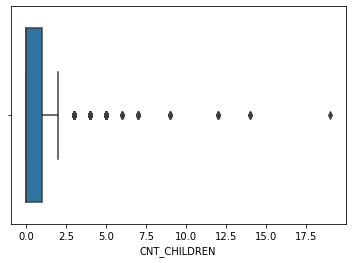

In [ ]:
import seaborn as sns
sns.boxplot(x=pd_app_df['CNT_CHILDREN'])

In [ ]:
# From the above plot we can see that there are a lot of outliers after 2. 
# Moreover it makes sense to remove rows which have more than 2 children as the count is also less (compared to entire data)
more_than_2_child = df_application_record.filter('cnt_children > 2').count()
total_records = df_application_record.count()
percent = more_than_2_child/total_records
percent

0.01385224725634296

In [ ]:
# As you can see above the number of records with more than 2 children is less than 1 %
# Also we do not want to take risk including them as probably there is high possibility for
# families with more than 2 children to become a defaulter.Hence let us remove them.
df_application_record = df_application_record.filter('cnt_children <= 2')

In [ ]:
# Checking toal count now
df_application_record.count()

432482

In [ ]:
# Checking the values in chidlren count now
df_application_record.groupBy('cnt_children').count().orderBy('count', ascending = 0).show()

+------------+------+
|cnt_children| count|
+------------+------+
|           0|304071|
|           1| 88527|
|           2| 39884|
+------------+------+



In [ ]:
# Let us proceed to the next column which is AMT_INCOME_TOTAL.
df_application_record.groupBy('amt_income_total').count().orderBy('count', ascending = 0).show(100)

+----------------+-----+
|amt_income_total|count|
+----------------+-----+
|        135000.0|46199|
|        157500.0|39233|
|        180000.0|37443|
|        112500.0|36357|
|        225000.0|33694|
|        202500.0|27438|
|         90000.0|22419|
|        270000.0|19349|
|        315000.0|11771|
|        247500.0|10297|
|         67500.0| 9278|
|        360000.0| 8108|
|        292500.0| 7077|
|        126000.0| 6533|
|         81000.0| 6008|
|        121500.0| 5249|
|        144000.0| 4988|
|        450000.0| 4558|
|         99000.0| 4315|
|        171000.0| 4134|
|        103500.0| 3632|
|        337500.0| 3450|
|        166500.0| 3416|
|        405000.0| 3364|
|        117000.0| 3129|
|        189000.0| 3082|
|         76500.0| 3069|
|        216000.0| 2891|
|        162000.0| 2654|
|        382500.0| 2258|
|        148500.0| 2154|
|        108000.0| 2151|
|         72000.0| 2033|
|         94500.0| 1967|
|        193500.0| 1957|
|        130500.0| 1835|
|        211500.0| 1701|


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

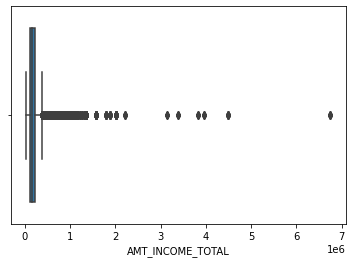

In [ ]:
sns.boxplot(x=pd_app_df['AMT_INCOME_TOTAL'])

In [ ]:
pd_app_df = df_application_record.toPandas()
pd_app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.324820e+05,432482.000000,4.324820e+05,432482.000000,432482.000000,432482.0,432482.000000,432482.000000,432482.000000,432482.000000
mean,6.022326e+06,0.389138,1.875133e+05,-16029.902387,61325.514232,1.0,0.205488,0.288030,0.108016,2.153979
std,5.716234e+05,0.649733,1.101544e+05,4198.601778,139430.278902,0.0,0.404058,0.452846,0.310401,0.831849
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609498e+06,0.000000,1.215000e+05,-19537.000000,-3099.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047774e+06,0.000000,1.612282e+05,-15688.000000,-1459.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.457024e+06,1.000000,2.250000e+05,-12520.000000,-363.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,2.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,4.000000


In [ ]:
# From the box plot above and using the distribution of Amount income total, 
# we can see there are more outlier after 2.250000e+05 (i.e.) 225000
# Let us calculate the percentage of records above this value as we did before.
more_than_two_point_five = df_application_record.filter('amt_income_total > 225000').count()
total_records = df_application_record.count()
percent = more_than_two_point_five/total_records
percent

0.21125734712658562

In [ ]:
# as you can see above the number of records above 225000 is very less.
# However there is a great chance for this to affect the model
# moreover people who get high salary would go for other methods which give bulk money at once like personal loan.
# So let us target the mid range of people who look to do recursive spends of small amounts (which is a case to use credit cards)
# Also since we want to identify defaulters, there is more chance for people with middle range salary to default.

df_application_record = df_application_record.filter('amt_income_total <= 225000')
df_application_record.count()

341117

In [ ]:
pd_app_df = df_application_record.toPandas()
pd_app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.411170e+05,341117.000000,341117.000000,341117.000000,341117.000000,341117.0,341117.000000,341117.000000,341117.000000,341117.000000
mean,6.019979e+06,0.384965,148019.291762,-16094.344257,69069.406626,1.0,0.211587,0.285292,0.092382,2.150875
std,5.720750e+05,0.647962,46366.592765,4300.380583,145701.446936,0.0,0.408434,0.451554,0.289565,0.830516
min,5.008806e+06,0.000000,26100.000000,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.598871e+06,0.000000,112500.000000,-19771.000000,-2986.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.046111e+06,0.000000,144000.000000,-15741.000000,-1344.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.451119e+06,1.000000,180000.000000,-12459.000000,-269.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,2.000000,225000.000000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,4.000000


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

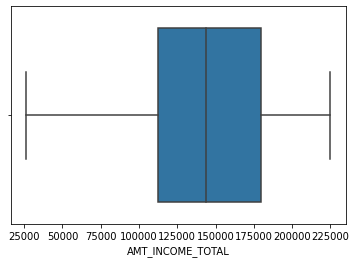

In [ ]:
# Now checking the box plot, we get a proper distribution
sns.boxplot(x=pd_app_df['AMT_INCOME_TOTAL'])

In [ ]:
# Proceeding with next column NAME_INCOME_TYPE and it looks fine.
df_application_record.groupBy('NAME_INCOME_TYPE').count().orderBy('count', ascending = 0).show()

+--------------------+------+
|    NAME_INCOME_TYPE| count|
+--------------------+------+
|             Working|180519|
|Commercial associate| 68054|
|           Pensioner| 66573|
|       State servant| 25954|
|             Student|    17|
+--------------------+------+



In [ ]:
# Proceeding with next column NAME_EDUCATION_TYPE and it looks fine.
df_application_record.groupBy('NAME_EDUCATION_TYPE').count().orderBy('count', ascending = 0).show()

+--------------------+------+
| NAME_EDUCATION_TYPE| count|
+--------------------+------+
|Secondary / secon...|249284|
|    Higher education| 77374|
|   Incomplete higher| 10602|
|     Lower secondary|  3660|
|     Academic degree|   197|
+--------------------+------+



In [ ]:
# Proceeding with next column NAME_FAMILY_STATUS and it looks fine.
df_application_record.groupBy('NAME_FAMILY_STATUS').count().orderBy('count', ascending = 0).show()

+--------------------+------+
|  NAME_FAMILY_STATUS| count|
+--------------------+------+
|             Married|233226|
|Single / not married| 42967|
|      Civil marriage| 27990|
|           Separated| 20628|
|               Widow| 16306|
+--------------------+------+



In [ ]:
# Proceeding with next column NAME_HOUSING_TYPE and it looks fine.
df_application_record.groupBy('NAME_HOUSING_TYPE').count().orderBy('count', ascending = 0).show()

+-------------------+------+
|  NAME_HOUSING_TYPE| count|
+-------------------+------+
|  House / apartment|306179|
|       With parents| 15769|
|Municipal apartment| 10803|
|   Rented apartment|  4550|
|   Office apartment|  2650|
|    Co-op apartment|  1166|
+-------------------+------+



In [ ]:
# Proceeding with next column DAYS_BIRTH.
df_application_record.groupBy('DAYS_BIRTH').count().orderBy('count', ascending = 0).show()

+----------+-----+
|DAYS_BIRTH|count|
+----------+-----+
|    -11707|  130|
|    -14178|  118|
|    -15675|  100|
|    -10312|   96|
|    -17742|   93|
|    -12394|   93|
|    -14400|   90|
|    -17031|   89|
|    -21041|   87|
|    -14281|   87|
|    -14720|   87|
|    -14436|   86|
|    -14926|   86|
|    -12956|   85|
|    -13689|   85|
|    -10216|   84|
|    -21338|   83|
|    -22791|   82|
|    -17051|   82|
|    -14386|   81|
+----------+-----+
only showing top 20 rows



In [ ]:
# Let us have a look at the schema
df_application_record.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



In [ ]:
# Proceeding with next column DAYS_EMPLOYED.
df_application_record.groupBy('DAYS_EMPLOYED').count().orderBy('count', ascending = 0).show()

+-------------+-----+
|DAYS_EMPLOYED|count|
+-------------+-----+
|       365243|66456|
|         -978|  216|
|         -218|  200|
|        -2317|  198|
|         -271|  192|
|         -231|  192|
|         -249|  191|
|         -186|  188|
|         -302|  186|
|         -209|  186|
|         -116|  184|
|         -430|  182|
|         -187|  181|
|         -179|  178|
|         -232|  176|
|         -214|  175|
|         -512|  175|
|         -579|  173|
|         -451|  172|
|         -795|  169|
+-------------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='DAYS_EMPLOYED'>

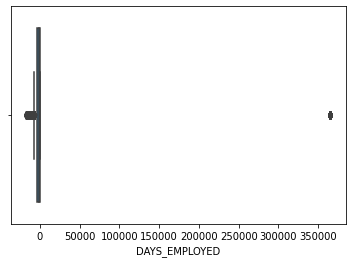

In [ ]:
# Since the first value looks positive and like an outlier, let us plot a box plot for above column
sns.boxplot(x=pd_app_df['DAYS_EMPLOYED'])

In [ ]:
# as we can see above clearly all the values are below 0 mostly whereas just 1 is above
# Let us check the values count using pandas
pd_app_df['DAYS_EMPLOYED'].value_counts()

 365243    66456
-978         216
-218         200
-2317        198
-231         192
           ...  
-8361          1
-7344          1
-11804         1
-12462         1
-8444          1
Name: DAYS_EMPLOYED, Length: 8815, dtype: int64

In [ ]:
# Checking values above 0
df_application_record.filter('DAYS_EMPLOYED > 0').count()

66456

In [ ]:
# From the above plot and information 365243 seems to be the only value above 0.
# Checking the percentage of values.
more_than_zero = df_application_record.filter('DAYS_EMPLOYED > 0').count()
total_records = df_application_record.count()
percent = more_than_zero/total_records
percent

0.1948187865160634

In [ ]:
# Since the percentage of values is also less, let us drop these values as it does not make sense compared to other values.
df_application_record = df_application_record.filter('DAYS_EMPLOYED < 0')
df_application_record.count()

274661

In [ ]:
# Proceeding with next column FLAG_MOBIL.
pd_app_df = df_application_record.toPandas()
pd_app_df['FLAG_MOBIL'].value_counts()

1    274661
Name: FLAG_MOBIL, dtype: int64

In [ ]:
# From the above value we can understand that everyone has a mobile phone in our sample.
# Hence let us drop this column as this does not contribute to anything in the model's decision
df_application_record = df_application_record.drop('FLAG_MOBIL')
df_application_record.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



In [ ]:
# Let us see how the converted FLAG_WORK_PHONE values look
df_application_record.groupBy('FLAG_WORK_PHONE').count().orderBy('count', ascending = 0).show()

+---------------+------+
|FLAG_WORK_PHONE| count|
+---------------+------+
|              0|202485|
|              1| 72176|
+---------------+------+



In [ ]:
# Since above seems fine Let us see how the converted FLAG_PHONE values look
df_application_record.groupBy('FLAG_PHONE').count().orderBy('count', ascending = 0).show()

+----------+------+
|FLAG_PHONE| count|
+----------+------+
|         0|196828|
|         1| 77833|
+----------+------+



In [ ]:
# Since above seems fine Let us see how the converted FLAG_EMAIL values look
df_application_record.groupBy('FLAG_EMAIL').count().orderBy('count', ascending = 0).show()

+----------+------+
|FLAG_EMAIL| count|
+----------+------+
|         0|246433|
|         1| 28228|
+----------+------+



In [ ]:
# Since above seems fine Let us see how the converted OCCUPATION_TYPE values look
df_application_record.groupBy('OCCUPATION_TYPE').count().orderBy('count', ascending = 0).show()

+--------------------+-----+
|     OCCUPATION_TYPE|count|
+--------------------+-----+
|            Laborers|63272|
|                null|44523|
|         Sales staff|34043|
|          Core staff|32927|
|             Drivers|19142|
|            Managers|17300|
|High skill tech s...|12905|
|      Medicine staff|11203|
|         Accountants|11012|
|       Cooking staff| 6976|
|      Security staff| 6782|
|      Cleaning staff| 5210|
|Private service s...| 2544|
|  Low-skill Laborers| 1921|
|         Secretaries| 1809|
|Waiters/barmen staff| 1440|
|       Realty agents|  640|
|            HR staff|  580|
|            IT staff|  432|
+--------------------+-----+



In [ ]:
# We can see a value called null. let us reconfirm.
df_application_record.select([count(when(col(c).isNull(), c)).alias(c) for c in df_application_record.columns]).show()

+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+----------+-------------+---------------+----------+----------+---------------+---------------+
| ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|NAME_INCOME_TYPE|NAME_EDUCATION_TYPE|NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|
+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+----------+-------------+---------------+----------+----------+---------------+---------------+
|  0|          0|           0|              0|           0|               0|               0|                  0|                 0|                0|         0|            0|              0|         0|         0|          44523|              0|
+---+-----------

In [ ]:
# Let us remove these Null values.
df_application_record = df_application_record.filter(col('OCCUPATION_TYPE').isNotNull())
df_application_record.count()

230138

In [ ]:
# Let us examine the values again and they look good
df_application_record.groupBy('OCCUPATION_TYPE').count().orderBy('count', ascending = 0).show()

+--------------------+-----+
|     OCCUPATION_TYPE|count|
+--------------------+-----+
|            Laborers|63272|
|         Sales staff|34043|
|          Core staff|32927|
|             Drivers|19142|
|            Managers|17300|
|High skill tech s...|12905|
|      Medicine staff|11203|
|         Accountants|11012|
|       Cooking staff| 6976|
|      Security staff| 6782|
|      Cleaning staff| 5210|
|Private service s...| 2544|
|  Low-skill Laborers| 1921|
|         Secretaries| 1809|
|Waiters/barmen staff| 1440|
|       Realty agents|  640|
|            HR staff|  580|
|            IT staff|  432|
+--------------------+-----+



In [ ]:
# Since above seems fine Let us see how the converted CNT_FAM_MEMBERS values look
df_application_record.groupBy('CNT_FAM_MEMBERS').count().orderBy('count', ascending = 0).show()

+---------------+------+
|CNT_FAM_MEMBERS| count|
+---------------+------+
|            2.0|117590|
|            3.0| 49986|
|            1.0| 38187|
|            4.0| 24375|
+---------------+------+



In [ ]:
# Now let us look at schema
df_application_record.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



## Merge both data

In [ ]:
# Now that we are done with data cleaning, let us join both the tables.
# Here we need to do inner join since we need data there is present in both tables.
df_merged = df_application_record.join(df_credit_record, on = 'id')
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- STATUS: string (nullable = true)



In [ ]:
# Let us look at values using pandas dataframe for better readability
pd_merged_df = df_merged.toPandas()
pd_merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19692,-5273,1,1,0,Laborers,2.0,0,0
1,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19692,-5273,1,1,0,Laborers,2.0,-1,0
2,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19692,-5273,1,1,0,Laborers,2.0,-2,0
3,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19692,-5273,1,1,0,Laborers,2.0,-3,0
4,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19692,-5273,1,1,0,Laborers,2.0,-4,0


In [ ]:
# Checking total count
df_merged.count()

396457

In [ ]:
# Dropping duplicates
df_merged = df_merged.dropDuplicates()
df_merged.count()

396457

- Looks like there are no duplicates.
- Now let us build the target variable.
- Let us see the data for a single customer to understand how the target variable can be built

In [ ]:
pd_temp = df_merged.filter(col('ID') == 5025981).toPandas()
pd_temp.head(100)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0,1
1,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-1,0
2,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-2,1
3,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-3,0
4,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-4,0
5,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-5,0
6,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-6,0
7,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-7,0
8,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-8,0
9,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,-9,0


 - From above we can see that for a single customer there are 25 records each for a month.
 - However a customer is considered delinquent if the customer has ever delayed their payment by more than 60 days.
 - Considering that the number of days count was done properly for each month (i.e) added up from previous months, 
 - we can take the STATUS column alone for building target variable and leave the MONTHS_BALANCE column from calculation

In [ ]:
from pyspark.sql.types import *
df_merged = df_merged.withColumn("DELINQUENT", df_merged["STATUS"].cast(IntegerType()))

In [ ]:
# Let us verify if the target value is properly assigned.
df_merged.groupBy('STATUS','DELINQUENT').count().orderBy('count', ascending = 0).show()

+------+----------+------+
|STATUS|DELINQUENT| count|
+------+----------+------+
|     C|      null|170214|
|     0|         0|146380|
|     X|      null| 73771|
|     1|         1|  4653|
|     5|         5|   828|
|     2|         2|   372|
|     3|         3|   132|
|     4|         4|   107|
+------+----------+------+



 - Now let us convert the above values into binary (0 or 1) based on our rule.
 - If the STATUS value is greater than 1 (more than 60 days) then DELINQUENT should be 1
 - However if the customer has not got any loan for that month then that record can be dropped as it does not serve our purpose

In [ ]:
df_merged = df_merged.filter(col('STATUS') != 'X')
df_merged = df_merged.withColumn('DELINQUENT_FINAL', when(col("DELINQUENT").isNull(), 0).when(col('DELINQUENT') > 1, 1).otherwise(0))
df_merged.groupBy('STATUS','DELINQUENT','DELINQUENT_FINAL').count().orderBy('count', ascending = 0).show()

+------+----------+----------------+------+
|STATUS|DELINQUENT|DELINQUENT_FINAL| count|
+------+----------+----------------+------+
|     C|      null|               0|170214|
|     0|         0|               0|146380|
|     1|         1|               0|  4653|
|     5|         5|               1|   828|
|     2|         2|               1|   372|
|     3|         3|               1|   132|
|     4|         4|               1|   107|
+------+----------+----------------+------+



 - Now let us remove the columns we do not need like STATUS,MONTHS_BALANCE and DELINQUENT and rename DELINQUENT_FINAL to DELINQUENT

In [ ]:
df_merged = df_merged.drop('STATUS','MONTHS_BALANCE','DELINQUENT').withColumnRenamed('DELINQUENT_FINAL','DELINQUENT')
df_merged.groupBy('DELINQUENT').count().orderBy('count', ascending = 0).show()

+----------+------+
|DELINQUENT| count|
+----------+------+
|         0|321247|
|         1|  1439|
+----------+------+



In [ ]:
# Let us have a look at the single customer data
pd_temp = df_merged.filter(col('ID') == 5025981).toPandas()
pd_temp.head(100)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DELINQUENT
0,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
1,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
2,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
3,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
4,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
5,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
6,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
7,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
8,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0
9,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0


In [ ]:
# Let us drop duplicates and again check how the target variable is distributed
df_merged = df_merged.dropDuplicates()
df_merged.groupBy('DELINQUENT').count().orderBy('count', ascending = 0).show()

+----------+-----+
|DELINQUENT|count|
+----------+-----+
|         0|17046|
|         1|  307|
+----------+-----+



In [ ]:
# Again let us check the data for same client
# Let us have a look at the single customer data
pd_temp = df_merged.filter(col('ID') == 5025981).toPandas()
pd_temp.head(100)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DELINQUENT
0,5025981,M,N,N,1,189000.0,Working,Secondary / secondary special,Married,House / apartment,-11700,-404,0,0,0,Managers,3.0,0


In [ ]:
# Let us try to see a customer who is classified as delinquent
df_merged.filter(col('DELINQUENT') == 1).toPandas().head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DELINQUENT
0,5023641,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,0,0,0,Drivers,1.0,1
1,5116036,M,Y,Y,0,126000.0,Working,Higher education,Single / not married,House / apartment,-14522,-863,1,0,0,Managers,1.0,1
2,5146444,F,N,Y,0,135000.0,Working,Secondary / secondary special,Widow,House / apartment,-14394,-919,0,1,0,Managers,1.0,1
3,5111144,M,N,N,0,135000.0,Working,Secondary / secondary special,Civil marriage,With parents,-15104,-1699,0,0,0,Laborers,2.0,1
4,5033514,F,Y,N,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15952,-384,1,0,0,Sales staff,3.0,1
5,5053148,F,N,Y,1,126000.0,Working,Secondary / secondary special,Married,House / apartment,-12140,-779,0,0,0,Core staff,1.0,1
6,5009938,F,N,Y,2,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10710,-2351,0,0,0,Sales staff,4.0,1
7,5022426,F,N,Y,0,90000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16569,-517,0,0,0,Laborers,2.0,1
8,5050731,F,N,N,0,135000.0,Commercial associate,Higher education,Separated,House / apartment,-11712,-4822,0,1,1,HR staff,1.0,1
9,5116455,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-18090,-9194,0,0,0,Medicine staff,2.0,1


In [ ]:
# Picking 1 customer and checking the data in credit record
df_credit_record.filter(col('ID') == 5023641).toPandas().head(30)

,ID,MONTHS_BALANCE,STATUS
0,5023641,0,C
1,5023641,-1,C
2,5023641,-2,C
3,5023641,-3,C
4,5023641,-4,C
5,5023641,-5,C
6,5023641,-6,C
7,5023641,-7,C
8,5023641,-8,C
9,5023641,-9,C


 - From the above data we can see the customer has 2 in STATUS column once. 
 - Hence we can conclude that the target variable is built properly.

## Answer EDA questions

#### 1. What is the proportion of females in the applicant customer base?

In [ ]:
df_merged.filter(col('CODE_GENDER') == 'F').count()/df_merged.count()

0.6619604679306171

#### 2. Is homeownership higher among male applicants or female applicants? - Female. Check below.

In [ ]:
df_merged.filter(col('FLAG_OWN_REALTY') == 'Y').groupBy('CODE_GENDER').count().show()

+-----------+-----+
|CODE_GENDER|count|
+-----------+-----+
|          F| 7570|
|          M| 3615|
+-----------+-----+



#### 3. Is there any correlation between the customer's income level and education level?
#### Here we need to find correlation between AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

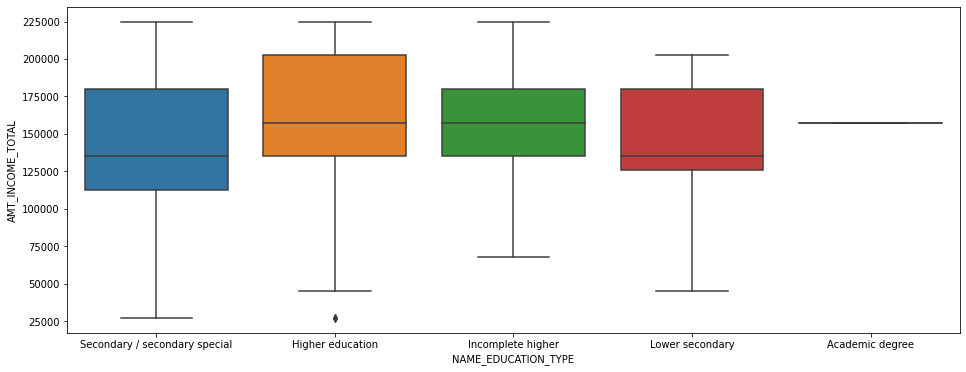

In [ ]:
pd_merged_df = df_merged.toPandas()

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.boxplot(x=pd_merged_df['NAME_EDUCATION_TYPE'], y=pd_merged_df['AMT_INCOME_TOTAL'])

#### Yes. As we can see above, those who completed Higher Education have more income than others.

#### 4. What is the average and median salary of the applicant base?

In [ ]:
pd_merged_df['AMT_INCOME_TOTAL'].mean()

151366.59620814846

In [ ]:
pd_merged_df['AMT_INCOME_TOTAL'].median()

148500.0

##### 5. Is the proportion of bad customers higher for people who own cars?

In [ ]:
df_merged.filter(col('FLAG_OWN_CAR') == 'Y').groupBy('DELINQUENT').count().orderBy('count', ascending = 0).show()

+----------+-----+
|DELINQUENT|count|
+----------+-----+
|         0| 6276|
|         1|  131|
+----------+-----+



#### No. The proportion of good customers are high. Bad customers are less.

#### 6. Is the proportion of bad customers higher for those living on rent than the rest of the population?

In [ ]:
df_merged.filter(col('NAME_HOUSING_TYPE') == 'Rented apartment').groupBy('DELINQUENT').count().orderBy('count', ascending = 0).show()

+----------+-----+
|DELINQUENT|count|
+----------+-----+
|         0|  251|
|         1|    5|
+----------+-----+



In [ ]:
df_merged.filter(col('NAME_HOUSING_TYPE') != 'Rented apartment').groupBy('DELINQUENT').count().orderBy('count', ascending = 0).show()

+----------+-----+
|DELINQUENT|count|
+----------+-----+
|         0|16795|
|         1|  302|
+----------+-----+



#### As you can see above the proportion of bad customers for those living on rent (5) is less than rest of the population (302)

#### 7. Is the proportion of bad customers higher for those who are single than married customers?

In [ ]:
df_merged.filter((col('NAME_FAMILY_STATUS') == 'Married') | (col('NAME_FAMILY_STATUS') == 'Civil marriage')).groupBy('DELINQUENT').count().orderBy('count', ascending = 0).show()

+----------+-----+
|DELINQUENT|count|
+----------+-----+
|         0|13298|
|         1|  228|
+----------+-----+



In [ ]:
df_merged.filter(col('NAME_FAMILY_STATUS') == 'Single / not married').groupBy('DELINQUENT').count().orderBy('count', ascending = 0).show()

+----------+-----+
|DELINQUENT|count|
+----------+-----+
|         0| 2358|
|         1|   52|
+----------+-----+



#### No. The proportion of bad customers is high for married (both normal and civil) than single customers.

## Visualizations with target variable

### Let us visualize how the target variable is distributed across gender

<AxesSubplot:>

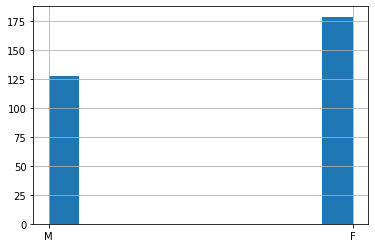

In [ ]:
pd_delinquent = pd_merged_df[pd_merged_df['DELINQUENT'] == 1]
pd_delinquent['CODE_GENDER'].hist()

### As we can see above the number of delinquent (bad) customers is more in Female than male.

<AxesSubplot:>

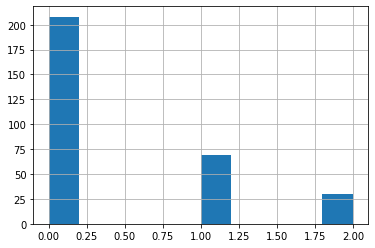

In [ ]:
pd_delinquent['CNT_CHILDREN'].hist()

### The number of delinquent customers is more when there is no children.
### It makes sense as people with more children are more concerned about their credit scores as they pay properly and buy regularly.


<AxesSubplot:>

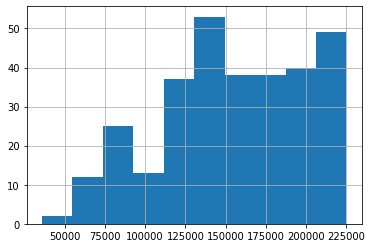

In [ ]:
pd_delinquent['AMT_INCOME_TOTAL'].hist()

### As we can see above delinquency is more for people with median salary and also rises up as the salary increases.

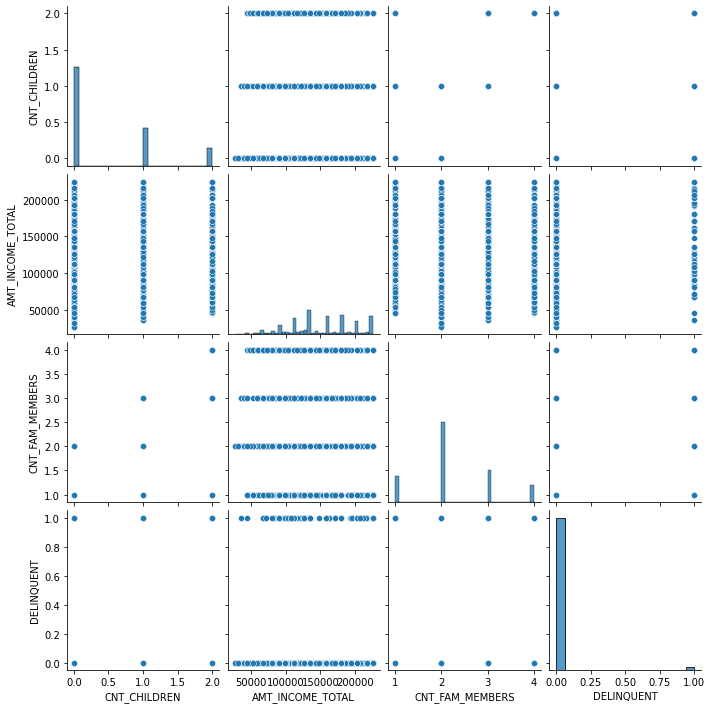

In [ ]:
sns.pairplot(pd_merged_df, vars = ['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','DELINQUENT'])

### Since most of the variables are categorical, we cannot derive much insights here. In delinquent row and column we can see that the number of delinquent customers are very less. Hence we can say that the data we have is highly imbalanced.

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='AMT_INCOME_TOTAL'>

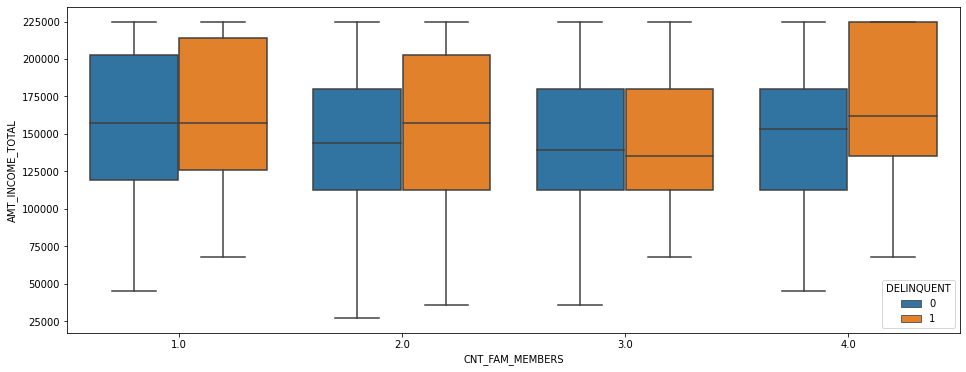

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=pd_merged_df, x="CNT_FAM_MEMBERS", y="AMT_INCOME_TOTAL", hue="DELINQUENT")

### From the above plot we can see that as the family members increases delinquency also increases along with income.

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_INCOME_TOTAL'>

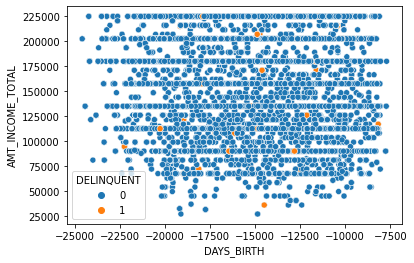

In [ ]:
sns.scatterplot(data=pd_merged_df, x="DAYS_BIRTH", y="AMT_INCOME_TOTAL", hue="DELINQUENT")

#### There are multiple insights we can derive from above plot
 - Delinquency is less as income increases as there are less orange dots on top
 - The data is more densy populated on middle age (i.e.) as people get older they do not have income or our data has more young and middle aged people than old people.
 - We can say that there are people at various age groups getting almost same salary as we can see there are horizontal lines in the plot.

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='AMT_INCOME_TOTAL'>

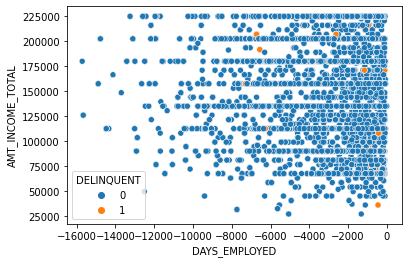

In [ ]:
sns.scatterplot(data=pd_merged_df, x="DAYS_EMPLOYED", y="AMT_INCOME_TOTAL", hue="DELINQUENT")

#### In this plot also we can derive multiple interesting insights.
 - There are less people with more than 16 years (6000 days) experience.
 - Delinquency is more for people who have less than 5 years of experience
 - Here too we see there are people across different experience but getting same salary (as we see horizontal lines)

## WOE-IV implementatons

#### Before we proceed to WOE-IV calculations, let us split the available columns into 2 list. One will contain categorical variable for which WOE-IV can be calculated as such and another which are continous and hence we need to create monotonous bins

In [ ]:
# Let us have a look at the schema
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)



#### Now let us first calculate WOE and IV for catgorical and numerical discrete variables. For these variables we need not do anything as they are already separated

In [ ]:
cols_categorical = ['CODE_GENDER',
                    'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY',
                    'CNT_CHILDREN',
                    'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS',
                    'NAME_HOUSING_TYPE',
                    'FLAG_WORK_PHONE',
                    'FLAG_PHONE',
                    'FLAG_EMAIL',
                    'OCCUPATION_TYPE',
                    'CNT_FAM_MEMBERS',
                    'DELINQUENT']

In [ ]:
from pyspark.sql import functions as F
import math

#### Below is the code for calculation of WOE and IV

In [ ]:
class WOE_IV(object):
    
    """
    This class contains methods that are used for calculating the WOE and IV values in a given dataset.
    
    Attributes
    ----------
    df : spark DataFrame
        The spark dataframe
    cols_to_woe : list
        Columns that you want to convert in WOE and IV
    label_column : str
        target column of the data
    good_label : str
        Predicted variable in the form of 1 or 0
    """
    
    def __init__(self, df: DataFrame, cols_to_woe: [str], label_column: str, good_label: str):
        self.df = df
        self.cols_to_woe = cols_to_woe
        self.label_column = label_column
        self.good_label = good_label
        self.fit_data = {} # This is a dictionary which will store all the WOE and IV computed in the latter part of the code

    def fit(self):  
        """
        This method takes the columns in 'cols_to_woe' and calculates the good and bad amounts, and then assigns the WOE values in the dictionary, 'fit_data'
        """
        for col_to_woe in self.cols_to_woe: # Iterating over each column in the list, cols_to_woe
            
            total_good = self.compute_total_amount_of_good() # Computes the total amount of good labels in the entire dataset
            total_bad = self.compute_total_amount_of_bad() # Computes the total amount of bad labels in the entire dataset
            
            woe_df = self.df.select(col_to_woe) # This dataframe stores the column, col_to_woe from the DataFrame
            categories = woe_df.distinct().collect() # Creates a list of all the distinct categories in the column, col_to_woe
            for category_row in categories: # Iterating over each category in the distinct categories of the column
                category = category_row[col_to_woe]
                
                # For each category, we calculate the good_amount and bad_amount
                good_amount = self.compute_good_amount(col_to_woe, category)
                bad_amount = self.compute_bad_amount(col_to_woe, category)
                
                # If the good_amount or bad_amount is 0, we replace it with 0.5, because in the calculation of woe, it comes in the denominator resulting in a Nan value which will give an error
                good_amount = good_amount if good_amount != 0 else 0.5
                bad_amount = bad_amount if bad_amount != 0 else 0.5

                # Calculating the fraction of good_amount and bad_amount specific to that category
                good_dist = good_amount / total_good
                bad_dist = bad_amount / total_bad

                # Calling the build_fit_data method which calculates the WOE and IV for the category in the column and stores it in the dictionary, fit_data
                self.build_fit_data(col_to_woe, category, good_dist, bad_dist)

    def transform(self, df: DataFrame):
        """
        This method creates a column called "col_to_woe + '_woe'" which replaces the given category value with the WOE value.
        It finally returns a final dataframe containing the WOE values in place of the columns
        """
        def _encode_woe(col_to_woe_):
            return F.coalesce(
                *[F.when(F.col(col_to_woe_) == category, F.lit(woe_iv['woe']))
                  for category, woe_iv in self.fit_data[col_to_woe_].items()]
            )

        for col_to_woe, woe_info in self.fit_data.items():
            # Adds another column to the df containing the final WOE values
            df = df.withColumn(col_to_woe + '_woe', _encode_woe(col_to_woe))
        return df

    def compute_total_amount_of_good(self):
     # Computes the total amount of good labels in the entire dataset
        return self.df.select(self.label_column).filter(F.col(self.label_column) == self.good_label).count()

    def compute_total_amount_of_bad(self):
     # Computes the total amount of bad labels in the entire dataset
        return self.df.select(self.label_column).filter(F.col(self.label_column) != self.good_label).count()

    def compute_good_amount(self, col_to_woe: str, category: str):
     # Computes the total amount of good labels for the specific class in the feature
        return self.df.select(col_to_woe, self.label_column)\
                      .filter(
                            (F.col(col_to_woe) == category) & (F.col(self.label_column) == self.good_label)
                      ).count()

    def compute_bad_amount(self, col_to_woe: str, category: str):
        # Computes the total amount of bad labels for the specific class in the feature
        return self.df.select(col_to_woe, self.label_column)\
                      .filter(
                            (F.col(col_to_woe) == category) & (F.col(self.label_column) != self.good_label)
                      ).count()

    def build_fit_data(self, col_to_woe, category, good_dist, bad_dist):
        """
        Calculates the WOE and value for the specific category and saves it in the woe_info dictionary which is saves in the fit_data dictionary
        
        
        Attributes:
        col_to_woe: str
        name of the feature
        
        category: str
        Class of that feature
        
        good_dist: float
        Fraction of good labels specific to that category
        
        bad_dist: float
        Fraction of bad labels specific to that category
        """
        woe_info = {
            category: {
                'woe': math.log(good_dist / bad_dist), # Calculating the WOE value for the category in the column
                'iv': (good_dist - bad_dist) * math.log(good_dist / bad_dist) # Calculating the IV value for the category in the column
            }
        }

        # Adding the feature, col_to_woe to fit_data if not present already
        if col_to_woe not in self.fit_data:
            self.fit_data[col_to_woe] = woe_info
        else:
            self.fit_data[col_to_woe].update(woe_info)

    def compute_iv(self):
        """
        Returns the IV dictionary which contains the IV value for each feature
        """
        iv_dict = {}

        for woe_col, categories in self.fit_data.items():
            iv_dict[woe_col] = 0
            for category, woe_iv in categories.items():
                iv_dict[woe_col] += woe_iv['iv'] # IV for the feature = IV value for the indiviual categories of the feature (column)
        return iv_dict

#### Creating an object for above class

In [ ]:
woe_iv_calculator = WOE_IV(df = df_merged, cols_to_woe = cols_categorical, label_column = 'DELINQUENT', good_label = '0')

#### Fitting

In [ ]:
woe_iv_calculator.fit()

In [ ]:
df_merged_with_woe_iv = woe_iv_calculator.transform(df_merged)

In [ ]:
df_merged_with_woe_iv.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)
 |-- CODE_GENDER_woe: double (nullable = true)
 |-- FLAG_OWN_CAR_woe: double (nullable = true)
 |-- FLAG_OWN_REALTY_woe: double (nullable = true)
 |-- CNT_CHILDREN_woe: doubl

In [ ]:
pd_merged_df_woe_iv = df_merged_with_woe_iv.toPandas()

In [ ]:
pd_merged_df_woe_iv

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,NAME_INCOME_TYPE_woe,NAME_EDUCATION_TYPE_woe,NAME_FAMILY_STATUS_woe,NAME_HOUSING_TYPE_woe,FLAG_WORK_PHONE_woe,FLAG_PHONE_woe,FLAG_EMAIL_woe,OCCUPATION_TYPE_woe,CNT_FAM_MEMBERS_woe,DELINQUENT_woe
0,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.046180,0.051254,0.068134,0.036499,-0.078209,-0.045301,-0.014560,0.062972,-0.031823,6.419995
1,5009429,M,N,N,0,198000.0,Working,Secondary / secondary special,Single / not married,With parents,...,-0.036471,0.051254,-0.202498,-0.053157,-0.078209,0.018775,-0.014560,0.062972,-0.130205,6.419995
2,5010236,M,Y,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,...,-0.036471,0.051254,0.068134,0.036499,0.033155,0.018775,-0.014560,-0.570163,-0.031823,6.419995
3,5010511,F,Y,Y,1,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.046180,0.051254,0.068134,0.036499,0.033155,0.018775,-0.014560,0.062972,0.106910,6.419995
4,5021819,F,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,...,-0.036471,0.051254,0.068134,0.036499,0.033155,-0.045301,0.164231,0.193451,0.106910,6.419995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17348,5148745,F,Y,Y,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.046180,0.051254,0.068134,0.036499,0.033155,0.018775,-0.014560,0.607060,-0.031823,6.419995
17349,5149419,F,N,Y,0,202500.0,Working,Higher education,Married,House / apartment,...,-0.036471,-0.016693,0.068134,0.036499,0.033155,-0.045301,-0.014560,-0.223342,-0.031823,6.419995
17350,5149751,F,N,Y,1,180000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,...,0.431043,0.051254,-0.202498,0.036499,0.033155,-0.045301,-0.014560,0.607060,-0.031823,6.419995
17351,5150004,M,Y,Y,1,225000.0,Working,Higher education,Separated,Municipal apartment,...,-0.036471,-0.016693,0.356835,-0.317286,0.033155,-0.045301,-0.014560,-0.298826,-0.031823,6.419995


#### As we can see above the WOE values are assigned to each category value for the categorical columns. Now let us proceed with calculation of IV for these columns

In [ ]:
woe_iv_calculator.compute_iv()

{'CODE_GENDER': 0.027553153924847695,
 'FLAG_OWN_CAR': 0.01432489444548546,
 'FLAG_OWN_REALTY': 0.04944469097024257,
 'CNT_CHILDREN': 0.007460458947549262,
 'NAME_INCOME_TYPE': 0.09318871261947567,
 'NAME_EDUCATION_TYPE': 0.023423221182797344,
 'NAME_FAMILY_STATUS': 0.030940711261236816,
 'NAME_HOUSING_TYPE': 0.016865991715713523,
 'FLAG_WORK_PHONE': 0.002592508674116603,
 'FLAG_PHONE': 0.0008504703107731712,
 'FLAG_EMAIL': 0.0023907857922530655,
 'OCCUPATION_TYPE': 0.15155547055399962,
 'CNT_FAM_MEMBERS': 0.009471275191823456,
 'DELINQUENT': 16.846050805125163}

#### IV values less than 0.002 to be insignificant in the modelling process
#### Hence from above list below columns can be considered as insignificant
 - FLAG_PHONE
#### Rest of the columns either has 0.002 or more than that. So we can exclude FLAG_PHONE from Modelling process

#### Now let us calculate WOE and IV for remaining continous variable which is AMT_INCOME_TOTAL, DAYS_BIRTH, DAYS_EMPLOYED. We need to split the data such that the WOE value is monotonic. Let us find the appropriate binning for AMT_INCOME_TOTAL column.

In [ ]:
# Let us take above columns into separate dataframe for better clarity along with Target variable
continous_cols = ['AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','DELINQUENT']
df_continous = df_merged[continous_cols]
df_continous.show()

+----------------+----------+-------------+----------+
|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|DELINQUENT|
+----------------+----------+-------------+----------+
|        135000.0|    -19692|        -5273|         0|
|        198000.0|     -8657|        -1164|         0|
|        225000.0|    -16507|        -4331|         0|
|        157500.0|    -13830|        -4239|         0|
|         67500.0|    -11454|        -1678|         0|
|        135000.0|     -9303|         -852|         0|
|        157500.0|    -15100|        -3500|         0|
|        202500.0|    -14096|        -1344|         0|
|         90000.0|    -16274|        -1513|         0|
|        202500.0|     -8568|        -1068|         0|
|         99000.0|    -21658|        -3471|         0|
|        189000.0|    -11700|         -404|         0|
|        112500.0|    -13935|         -560|         0|
|        135000.0|    -14221|        -1542|         0|
|        180000.0|    -15161|        -7140|         0|
|        1

#### Here we are using QuantileDiscretizer feature of Pyspark ML Lib

In [ ]:
from pyspark.ml.feature import QuantileDiscretizer
discretizer = QuantileDiscretizer(numBuckets=3, inputCol="AMT_INCOME_TOTAL", outputCol="AMT_INCOME_TOTAL_BIN")

result = discretizer.fit(df_continous).transform(df_continous)
result.show()

+----------------+----------+-------------+----------+--------------------+
|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|DELINQUENT|AMT_INCOME_TOTAL_BIN|
+----------------+----------+-------------+----------+--------------------+
|        135000.0|    -19692|        -5273|         0|                 1.0|
|        198000.0|     -8657|        -1164|         0|                 2.0|
|        225000.0|    -16507|        -4331|         0|                 2.0|
|        157500.0|    -13830|        -4239|         0|                 1.0|
|         67500.0|    -11454|        -1678|         0|                 0.0|
|        135000.0|     -9303|         -852|         0|                 1.0|
|        157500.0|    -15100|        -3500|         0|                 1.0|
|        202500.0|    -14096|        -1344|         0|                 2.0|
|         90000.0|    -16274|        -1513|         0|                 0.0|
|        202500.0|     -8568|        -1068|         0|                 2.0|
|         99

In [ ]:
# Calculating WOE for the 3 bin in AMT_INCOME_TOTAL
woe_iv_cont_calc = WOE_IV(df = result, cols_to_woe = ['AMT_INCOME_TOTAL_BIN'], label_column = 'DELINQUENT', good_label = '0')
woe_iv_cont_calc.fit()
result_with_woe_iv = woe_iv_cont_calc.transform(result)
result_with_woe_iv.show()

+----------------+----------+-------------+----------+--------------------+------------------------+
|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|DELINQUENT|AMT_INCOME_TOTAL_BIN|AMT_INCOME_TOTAL_BIN_woe|
+----------------+----------+-------------+----------+--------------------+------------------------+
|        135000.0|    -19692|        -5273|         0|                 1.0|     0.06427623197703412|
|        198000.0|     -8657|        -1164|         0|                 2.0|    -0.11966412069904914|
|        225000.0|    -16507|        -4331|         0|                 2.0|    -0.11966412069904914|
|        157500.0|    -13830|        -4239|         0|                 1.0|     0.06427623197703412|
|         67500.0|    -11454|        -1678|         0|                 0.0|     0.07955642381742424|
|        135000.0|     -9303|         -852|         0|                 1.0|     0.06427623197703412|
|        157500.0|    -15100|        -3500|         0|                 1.0|     0.064276231

In [ ]:
result_with_woe_iv.groupBy('AMT_INCOME_TOTAL_BIN','AMT_INCOME_TOTAL_BIN_woe').count().orderBy('AMT_INCOME_TOTAL_BIN', ascending = 0).show()

+--------------------+------------------------+-----+
|AMT_INCOME_TOTAL_BIN|AMT_INCOME_TOTAL_BIN_woe|count|
+--------------------+------------------------+-----+
|                 2.0|    -0.11966412069904914| 6132|
|                 1.0|     0.06427623197703412| 5720|
|                 0.0|     0.07955642381742424| 5501|
+--------------------+------------------------+-----+



#### We can clearly see above that the WOE values are monotonic and decreases. But let us also confirm using Spearman Correlation

In [ ]:
pd_res_woe_iv = result_with_woe_iv.toPandas()

In [ ]:
import scipy.stats.stats as stats
stats.spearmanr(pd_res_woe_iv['AMT_INCOME_TOTAL_BIN'], pd_res_woe_iv['AMT_INCOME_TOTAL_BIN_woe'])

SpearmanrResult(correlation=-1.0, pvalue=0.0)

#### As expected we got correlation of -1. Let us proceed with IV calculation

In [ ]:
woe_iv_cont_calc.compute_iv()

{'AMT_INCOME_TOTAL_BIN': 0.008614912461085665}

#### Conclusion:  Since the IV value is more than 0.002 AMT_INCOME_TOTAL is significant

#### Let us proceed with binning for DAYS_BIRTH

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=3, inputCol="DAYS_BIRTH", outputCol="DAYS_BIRTH_BIN")

result_with_woe_iv = discretizer.fit(result_with_woe_iv).transform(result_with_woe_iv)
result_with_woe_iv.show()

+----------------+----------+-------------+----------+--------------------+------------------------+--------------+
|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|DELINQUENT|AMT_INCOME_TOTAL_BIN|AMT_INCOME_TOTAL_BIN_woe|DAYS_BIRTH_BIN|
+----------------+----------+-------------+----------+--------------------+------------------------+--------------+
|        135000.0|    -19692|        -5273|         0|                 1.0|     0.06427623197703412|           0.0|
|        198000.0|     -8657|        -1164|         0|                 2.0|    -0.11966412069904914|           2.0|
|        225000.0|    -16507|        -4331|         0|                 2.0|    -0.11966412069904914|           0.0|
|        157500.0|    -13830|        -4239|         0|                 1.0|     0.06427623197703412|           1.0|
|         67500.0|    -11454|        -1678|         0|                 0.0|     0.07955642381742424|           2.0|
|        135000.0|     -9303|         -852|         0|                 1

In [ ]:
# Calculating WOE for the 3 bin in DAYS_BIRTH_BIN
woe_iv_cont_calc = WOE_IV(df = result_with_woe_iv, cols_to_woe = ['DAYS_BIRTH_BIN'], label_column = 'DELINQUENT', good_label = '0')
woe_iv_cont_calc.fit()
result_with_woe_iv = woe_iv_cont_calc.transform(result_with_woe_iv)
result_with_woe_iv.show()

+----------------+----------+-------------+----------+--------------------+------------------------+--------------+--------------------+
|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|DELINQUENT|AMT_INCOME_TOTAL_BIN|AMT_INCOME_TOTAL_BIN_woe|DAYS_BIRTH_BIN|  DAYS_BIRTH_BIN_woe|
+----------------+----------+-------------+----------+--------------------+------------------------+--------------+--------------------+
|        135000.0|    -19692|        -5273|         0|                 1.0|     0.06427623197703412|           0.0|-0.04371379065015217|
|        198000.0|     -8657|        -1164|         0|                 2.0|    -0.11966412069904914|           2.0|0.012762891378891859|
|        225000.0|    -16507|        -4331|         0|                 2.0|    -0.11966412069904914|           0.0|-0.04371379065015217|
|        157500.0|    -13830|        -4239|         0|                 1.0|     0.06427623197703412|           1.0| 0.03258748624779687|
|         67500.0|    -11454|        -167

In [ ]:
result_with_woe_iv.groupBy('DAYS_BIRTH_BIN','DAYS_BIRTH_BIN_woe').count().orderBy('DAYS_BIRTH_BIN', ascending = 0).show()

+--------------+--------------------+-----+
|DAYS_BIRTH_BIN|  DAYS_BIRTH_BIN_woe|count|
+--------------+--------------------+-----+
|           2.0|0.012762891378891859| 5781|
|           1.0| 0.03258748624779687| 5778|
|           0.0|-0.04371379065015217| 5794|
+--------------+--------------------+-----+



 - Above does not seem to be monotonic. Let us check Sparman Correlation

In [ ]:
pd_res_woe_iv = result_with_woe_iv.toPandas()
stats.spearmanr(pd_res_woe_iv['DAYS_BIRTH_BIN'], pd_res_woe_iv['DAYS_BIRTH_BIN_woe'])

SpearmanrResult(correlation=0.5012521025279609, pvalue=0.0)

 - Let us split into 2 bins and check if the spearman correlation improves.

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=2, inputCol="DAYS_BIRTH", outputCol="DAYS_BIRTH_BIN_1")

result_with_woe_iv = discretizer.fit(result_with_woe_iv).transform(result_with_woe_iv)
result_with_woe_iv.show()

+----------------+----------+-------------+----------+--------------------+------------------------+--------------+--------------------+----------------+
|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|DELINQUENT|AMT_INCOME_TOTAL_BIN|AMT_INCOME_TOTAL_BIN_woe|DAYS_BIRTH_BIN|  DAYS_BIRTH_BIN_woe|DAYS_BIRTH_BIN_1|
+----------------+----------+-------------+----------+--------------------+------------------------+--------------+--------------------+----------------+
|        135000.0|    -19692|        -5273|         0|                 1.0|     0.06427623197703412|           0.0|-0.04371379065015217|             0.0|
|        198000.0|     -8657|        -1164|         0|                 2.0|    -0.11966412069904914|           2.0|0.012762891378891859|             1.0|
|        225000.0|    -16507|        -4331|         0|                 2.0|    -0.11966412069904914|           0.0|-0.04371379065015217|             0.0|
|        157500.0|    -13830|        -4239|         0|                 1.0| 

In [ ]:
# Calculating WOE for the 2 bin in DAYS_BIRTH_BIN_1
woe_iv_cont_calc = WOE_IV(df = result_with_woe_iv, cols_to_woe = ['DAYS_BIRTH_BIN_1'], label_column = 'DELINQUENT', good_label = '0')
woe_iv_cont_calc.fit()
result_with_woe_iv = woe_iv_cont_calc.transform(result_with_woe_iv)
result_with_woe_iv.show()

+----------------+----------+-------------+----------+--------------------+------------------------+--------------+--------------------+----------------+--------------------+
|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|DELINQUENT|AMT_INCOME_TOTAL_BIN|AMT_INCOME_TOTAL_BIN_woe|DAYS_BIRTH_BIN|  DAYS_BIRTH_BIN_woe|DAYS_BIRTH_BIN_1|DAYS_BIRTH_BIN_1_woe|
+----------------+----------+-------------+----------+--------------------+------------------------+--------------+--------------------+----------------+--------------------+
|        135000.0|    -19692|        -5273|         0|                 1.0|     0.06427623197703412|           0.0|-0.04371379065015217|             0.0|-0.05506975284337276|
|        198000.0|     -8657|        -1164|         0|                 2.0|    -0.11966412069904914|           2.0|0.012762891378891859|             1.0|  0.0581394326209646|
|        225000.0|    -16507|        -4331|         0|                 2.0|    -0.11966412069904914|           0.0|-0.0437137

In [ ]:
result_with_woe_iv.groupBy('DAYS_BIRTH_BIN_1','DAYS_BIRTH_BIN_1_woe').count().orderBy('DAYS_BIRTH_BIN_1', ascending = 0).show()

+----------------+--------------------+-----+
|DAYS_BIRTH_BIN_1|DAYS_BIRTH_BIN_1_woe|count|
+----------------+--------------------+-----+
|             1.0|  0.0581394326209646| 8678|
|             0.0|-0.05506975284337276| 8675|
+----------------+--------------------+-----+



In [ ]:
pd_res_woe_iv = result_with_woe_iv.toPandas()
stats.spearmanr(pd_res_woe_iv['DAYS_BIRTH_BIN_1'], pd_res_woe_iv['DAYS_BIRTH_BIN_1_woe'])

SpearmanrResult(correlation=0.9999999999999998, pvalue=0.0)

 - Though the correlation is good, let us also see how it varies with 4 bins since having 2 bins is very less.

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=4, inputCol="DAYS_BIRTH", outputCol="DAYS_BIRTH_BIN_2")
result_with_woe_iv = discretizer.fit(result_with_woe_iv).transform(result_with_woe_iv)

# Calculating WOE for the 4 bin in DAYS_BIRTH_BIN_2
woe_iv_cont_calc = WOE_IV(df = result_with_woe_iv, cols_to_woe = ['DAYS_BIRTH_BIN_2'], label_column = 'DELINQUENT', good_label = '0')
woe_iv_cont_calc.fit()
result_with_woe_iv = woe_iv_cont_calc.transform(result_with_woe_iv)
result_with_woe_iv.groupBy('DAYS_BIRTH_BIN_2','DAYS_BIRTH_BIN_2_woe').count().orderBy('DAYS_BIRTH_BIN_2', ascending = 0).show()

+----------------+--------------------+-----+
|DAYS_BIRTH_BIN_2|DAYS_BIRTH_BIN_2_woe|count|
+----------------+--------------------+-----+
|             3.0|-0.00760268014640...| 4320|
|             2.0| 0.12537747990469023| 4348|
|             1.0|-0.01650749092122...| 4338|
|             0.0|-0.08991148557314922| 4347|
+----------------+--------------------+-----+



In [ ]:
pd_res_woe_iv = result_with_woe_iv.toPandas()
stats.spearmanr(pd_res_woe_iv['DAYS_BIRTH_BIN_2'], pd_res_woe_iv['DAYS_BIRTH_BIN_2_woe'])

SpearmanrResult(correlation=0.8005890325519788, pvalue=0.0)

 - Also checking with 5 bins

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="DAYS_BIRTH", outputCol="DAYS_BIRTH_BIN_3")
result_with_woe_iv = discretizer.fit(result_with_woe_iv).transform(result_with_woe_iv)

# Calculating WOE for the 5 bin in DAYS_BIRTH_BIN_3
woe_iv_cont_calc = WOE_IV(df = result_with_woe_iv, cols_to_woe = ['DAYS_BIRTH_BIN_3'], label_column = 'DELINQUENT', good_label = '0')
woe_iv_cont_calc.fit()
result_with_woe_iv = woe_iv_cont_calc.transform(result_with_woe_iv)
result_with_woe_iv.groupBy('DAYS_BIRTH_BIN_3','DAYS_BIRTH_BIN_3_woe').count().orderBy('DAYS_BIRTH_BIN_3', ascending = 0).show()

+----------------+--------------------+-----+
|DAYS_BIRTH_BIN_3|DAYS_BIRTH_BIN_3_woe|count|
+----------------+--------------------+-----+
|             4.0|-0.07406517102056565| 3469|
|             3.0| 0.13509131054853266| 3486|
|             2.0|-0.01360394110889...| 3458|
|             1.0|0.004127817338838354| 3462|
|             0.0|-0.04006628350033...| 3478|
+----------------+--------------------+-----+



In [ ]:
pd_res_woe_iv = result_with_woe_iv.toPandas()
stats.spearmanr(pd_res_woe_iv['DAYS_BIRTH_BIN_3'], pd_res_woe_iv['DAYS_BIRTH_BIN_3_woe'])

SpearmanrResult(correlation=-0.09874188236057285, pvalue=7.410963758282638e-39)

 - Balancing between the number of bins (to be not too less) and correlation, looking like 4 is the best option. So let us find the IV value with 4 bins

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=4, inputCol="DAYS_BIRTH", outputCol="DAYS_BIRTH_BIN_FINAL")
result_with_woe_iv = discretizer.fit(result_with_woe_iv).transform(result_with_woe_iv)

# Calculating WOE for the 4 bin in DAYS_BIRTH_BIN_FINAL
woe_iv_cont_calc = WOE_IV(df = result_with_woe_iv, cols_to_woe = ['DAYS_BIRTH_BIN_FINAL'], label_column = 'DELINQUENT', good_label = '0')
woe_iv_cont_calc.fit()
result_with_woe_iv = woe_iv_cont_calc.transform(result_with_woe_iv)
woe_iv_cont_calc.compute_iv()

{'DAYS_BIRTH_BIN_FINAL': 0.0064383521866895835}

#### Since IV is more than 0.002 DAYS_BIRTH is significant. Let us proceed in same way for DAYS_EMPLOYED

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=3, inputCol="DAYS_EMPLOYED", outputCol="DAYS_EMPLOYED_BIN")

result_with_woe_iv = discretizer.fit(result_with_woe_iv).transform(result_with_woe_iv)

# Calculating WOE for the 3 bin in DAYS_EMPLOYED_BIN
woe_iv_cont_calc = WOE_IV(df = result_with_woe_iv, cols_to_woe = ['DAYS_EMPLOYED_BIN'], label_column = 'DELINQUENT', good_label = '0')
woe_iv_cont_calc.fit()
result_with_woe_iv = woe_iv_cont_calc.transform(result_with_woe_iv)
result_with_woe_iv.groupBy('DAYS_EMPLOYED_BIN','DAYS_EMPLOYED_BIN_woe').count().orderBy('DAYS_EMPLOYED_BIN', ascending = 0).show()

+-----------------+---------------------+-----+
|DAYS_EMPLOYED_BIN|DAYS_EMPLOYED_BIN_woe|count|
+-----------------+---------------------+-----+
|              2.0|  -0.2609224172679821| 5778|
|              1.0|  0.12807373788988616| 5770|
|              0.0|  0.19224972438848137| 5805|
+-----------------+---------------------+-----+



In [ ]:
pd_res_woe_iv = result_with_woe_iv.toPandas()
stats.spearmanr(pd_res_woe_iv['DAYS_EMPLOYED_BIN'], pd_res_woe_iv['DAYS_EMPLOYED_BIN_woe'])

SpearmanrResult(correlation=-1.0, pvalue=0.0)

 - Since the correlation and number of bins is good, let us check IV

In [ ]:
woe_iv_cont_calc.compute_iv()

{'DAYS_EMPLOYED_BIN': 0.04217828934833584}

#### Since IV is more than 0.002 DAYS_EMPLOYED is significant. So below are the final list of columns to be taken for model training with FLAG_PHONE being the only column to be eliminated via WOE-IV method.
 - ID - denotes each customer. So it is needed.
 - CODE_GENDER
 - FLAG_OWN_CAR
 - FLAG_OWN_REALTY
 - CNT_CHILDREN
 - AMT_INCOME_TOTAL
 - NAME_INCOME_TYPE
 - NAME_EDUCATION_TYPE
 - NAME_FAMILY_STATUS
 - NAME_HOUSING_TYPE
 - DAYS_BIRTH
 - DAYS_EMPLOYED
 - FLAG_WORK_PHONE
 - FLAG_EMAIL
 - OCCUPATION_TYPE
 - CNT_FAM_MEMBERS
 - DELINQUENT - Target Column

In [ ]:
# Let us drop FLAG_PHONE
df_merged = df_merged.drop('FLAG_PHONE')
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)



## Model Building - (Model 1)

#### The above list of features can be split based on the transformations required as follows

#### Continuous columns with numerical data - No processing required except for DAYS_BIRTH and DAYS_EMPLOYED since they are negative
 - AMT_INCOME_TOTAL
 - DAYS_BIRTH
 - DAYS_EMPLOYED
 - CNT_CHILDREN
 - CNT_FAM_MEMBERS

In [ ]:
df_merged = df_merged.withColumn('DAYS_BIRTH_ABS',abs(df_merged.DAYS_BIRTH))
df_merged = df_merged.withColumn('DAYS_EMPLOYED_ABS',abs(df_merged.DAYS_EMPLOYED))

In [ ]:
# Let us look at values using pandas dataframe for better readability
pd_train = df_merged.toPandas()
pd_train.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DELINQUENT,DAYS_BIRTH_ABS,DAYS_EMPLOYED_ABS
0,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19692,-5273,1,0,Laborers,2.0,0,19692,5273
1,5009429,M,N,N,0,198000.0,Working,Secondary / secondary special,Single / not married,With parents,-8657,-1164,1,0,Laborers,1.0,0,8657,1164
2,5010236,M,Y,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16507,-4331,0,0,Drivers,2.0,0,16507,4331
3,5010511,F,Y,Y,1,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13830,-4239,0,0,Laborers,3.0,0,13830,4239
4,5021819,F,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-11454,-1678,0,1,Cooking staff,3.0,0,11454,1678


In [ ]:
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)
 |-- DAYS_BIRTH_ABS: integer (nullable = true)
 |-- DAYS_EMPLOYED_ABS: integer (nullable = true)



In [ ]:
# Dropping columns with negative values
df_merged = df_merged.drop('DAYS_BIRTH','DAYS_EMPLOYED')

In [ ]:
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)
 |-- DAYS_BIRTH_ABS: integer (nullable = true)
 |-- DAYS_EMPLOYED_ABS: integer (nullable = true)



#### Nominal categorical variables represented with integers. - One-hot encoding
 - FLAG_WORK_PHONE
 - FLAG_EMAIL

In [ ]:
df_merged.groupBy('FLAG_WORK_PHONE','FLAG_EMAIL').count().orderBy('count', ascending = 0).show()

+---------------+----------+-----+
|FLAG_WORK_PHONE|FLAG_EMAIL|count|
+---------------+----------+-----+
|              0|         0|11129|
|              1|         0| 4696|
|              0|         1| 1251|
|              1|         1|  277|
+---------------+----------+-----+



 - Since the values are already in 0's and 1's we do not need any encoding and can be sent for modelling as such

#### Nominal Categorical variables represented with strings - String indexer + One hot encoding
 - NAME_INCOME_TYPE
 - NAME_EDUCATION_TYPE
 - NAME_FAMILY_STATUS
 - NAME_HOUSING_TYPE
 - CODE_GENDER
 - FLAG_OWN_CAR
 - FLAG_OWN_REALTY
 - OCCUPATION_TYPE

In [ ]:
stringCols = ['NAME_INCOME_TYPE',
              'NAME_EDUCATION_TYPE',
              'NAME_FAMILY_STATUS',
              'NAME_HOUSING_TYPE',
              'CODE_GENDER',
              'FLAG_OWN_CAR',
              'FLAG_OWN_REALTY',
              'OCCUPATION_TYPE']

from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler

for c in stringCols:
    outCol = c + '_ix'
    si = StringIndexer(inputCol=c, outputCol=outCol)
    df_merged = si.fit(df_merged).transform(df_merged)

In [ ]:
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)
 |-- DAYS_BIRTH_ABS: integer (nullable = true)
 |-- DAYS_EMPLOYED_ABS: integer (nullable = true)
 |-- NAME_INCOME_TYPE_ix: double (nullable = false)
 |-- NAME_EDUCATION_TYPE_ix: double (nullable = false)
 |-- NAME_FAMILY_STATUS_ix: double (nullable = false)
 |-- NAME_HOUSING_TYPE_ix: double (nullable = fa

In [ ]:
# Let us view the columns
indexedCols = [c+'_ix' for c in stringCols]
df_merged.select(indexedCols).show()

+-------------------+----------------------+---------------------+--------------------+--------------+---------------+------------------+------------------+
|NAME_INCOME_TYPE_ix|NAME_EDUCATION_TYPE_ix|NAME_FAMILY_STATUS_ix|NAME_HOUSING_TYPE_ix|CODE_GENDER_ix|FLAG_OWN_CAR_ix|FLAG_OWN_REALTY_ix|OCCUPATION_TYPE_ix|
+-------------------+----------------------+---------------------+--------------------+--------------+---------------+------------------+------------------+
|                1.0|                   0.0|                  0.0|                 0.0|           0.0|            0.0|               1.0|               0.0|
|                0.0|                   0.0|                  1.0|                 1.0|           1.0|            0.0|               1.0|               0.0|
|                0.0|                   0.0|                  0.0|                 0.0|           1.0|            1.0|               0.0|               3.0|
|                1.0|                   0.0|              

In [ ]:
# Run all the catagorical columns through the one hot encoder
ohe = OneHotEncoderEstimator(inputCols=indexedCols, outputCols=[c+'Enc' for c in indexedCols])
enc_model = ohe.fit(df_merged)
df_merged = enc_model.transform(df_merged)

In [ ]:
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)
 |-- DAYS_BIRTH_ABS: integer (nullable = true)
 |-- DAYS_EMPLOYED_ABS: integer (nullable = true)
 |-- NAME_INCOME_TYPE_ix: double (nullable = false)
 |-- NAME_EDUCATION_TYPE_ix: double (nullable = false)
 |-- NAME_FAMILY_STATUS_ix: double (nullable = false)
 |-- NAME_HOUSING_TYPE_ix: double (nullable = fa

In [ ]:
trainCols = [c+'Enc' for c in indexedCols]
trainCols += ['AMT_INCOME_TOTAL',
              'DAYS_BIRTH_ABS',
              'DAYS_EMPLOYED_ABS',
              'CNT_CHILDREN',
              'CNT_FAM_MEMBERS',
              'FLAG_WORK_PHONE',
              'FLAG_EMAIL']

assembler = VectorAssembler(inputCols=trainCols, outputCol='features')
df_merged = assembler.transform(df_merged)

In [ ]:
df_merged.select('features').show()

+--------------------+
|            features|
+--------------------+
|(44,[1,4,8,12,17,...|
|(44,[0,4,9,13,18,...|
|(44,[0,4,8,12,19,...|
|(44,[1,4,8,12,17,...|
|(44,[0,4,8,12,17,...|
|(44,[0,5,8,12,19,...|
|(44,[0,4,10,12,17...|
|(44,[1,6,11,12,17...|
|(44,[0,4,8,12,17,...|
|(44,[0,4,9,12,17,...|
|(44,[0,4,10,12,20...|
|(44,[0,4,8,12,18,...|
|(44,[0,4,8,12,17,...|
|(44,[1,4,8,12,17,...|
|(44,[1,5,9,12,17,...|
|(44,[0,4,8,13,17,...|
|(44,[1,4,8,12,17,...|
|(44,[0,4,10,12,17...|
|(44,[1,5,8,13,19,...|
|(44,[0,4,8,13,17,...|
+--------------------+
only showing top 20 rows



#### Let us split the dataset now with seed value 2018

In [ ]:
df_train, df_test = df_merged.randomSplit([0.7,0.3], 2018)

In [ ]:
# train model in the training dataset

# import the logistic model
from pyspark.ml.classification import LogisticRegression

# create the logistic model, configure it and call fit it to the data. 
lr = LogisticRegression(featuresCol='features', labelCol='DELINQUENT')
model_1 = lr.fit(df_train)

## Model Evaluation - Model 1

In [ ]:
# use the model to predict the class labels of test data. 

result_test = model_1.evaluate(df_test)

result_test.recallByLabel

[1.0, 0.01]

#### The above model predicts all the non DELINQUENT cases correctly but DELINQUENT cases the recall value is very less 0.01 with a default threshold of 0.5

In [ ]:
result_test.precisionByLabel

[0.9808880308880309, 1.0]

#### Let us calculate F1 score of the model for DELINQUENT customers (target variable = 1)

### F1 score = 2 * ((Recall * Precision)/(Recall * Precision))

In [ ]:
recall_for_delinquent = result_test.recallByLabel[1]
precision_for_delinquent = result_test.precisionByLabel[1]
f1score = 2 * ((recall_for_delinquent * precision_for_delinquent)/(recall_for_delinquent + precision_for_delinquent))
f1score

0.019801980198019802

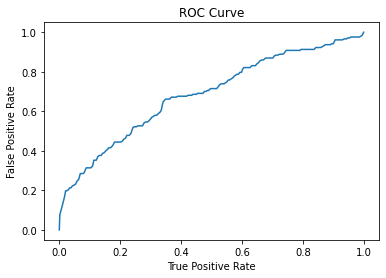

TestSet areaUnderROC: 0.684226538353612


In [ ]:
testSet = model_1.summary
roc = testSet.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('TestSet areaUnderROC: ' + str(testSet.areaUnderROC))

#### Calculation of KS Statistic

#### Let us take a look at preditions and probabilities to calculate KS Statistic

In [ ]:
predict_test = model_1.transform(df_test)

In [ ]:
predict_test.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)
 |-- DAYS_BIRTH_ABS: integer (nullable = true)
 |-- DAYS_EMPLOYED_ABS: integer (nullable = true)
 |-- NAME_INCOME_TYPE_ix: double (nullable = false)
 |-- NAME_EDUCATION_TYPE_ix: double (nullable = false)
 |-- NAME_FAMILY_STATUS_ix: double (nullable = false)
 |-- NAME_HOUSING_TYPE_ix: double (nullable = fa

In [ ]:
predict_test.select('probability','rawPrediction','prediction','DELINQUENT').show()

+--------------------+--------------------+----------+----------+
|         probability|       rawPrediction|prediction|DELINQUENT|
+--------------------+--------------------+----------+----------+
|[0.99066999920984...|[4.66514638155528...|       0.0|         0|
|[0.98556715369784...|[4.22371066375288...|       0.0|         0|
|[0.98833646213669...|[4.43955563478744...|       0.0|         0|
|[0.99227461251085...|[4.85548791416976...|       0.0|         0|
|[0.97745529987506...|[3.76945255117963...|       0.0|         0|
|[0.98604023755715...|[4.25751808245054...|       0.0|         0|
|[0.99087554985133...|[4.68763130609950...|       0.0|         0|
|[0.98996035700135...|[4.59112334316601...|       0.0|         0|
|[0.99652039817687...|[5.65735174066701...|       0.0|         0|
|[0.99433537526368...|[5.16783389961304...|       0.0|         0|
|[0.98725133864092...|[4.34949838144748...|       0.0|         0|
|[0.99015476035932...|[4.61087320135321...|       0.0|         0|
|[0.986582

In [ ]:
# Let us create another datafram with only those columns which are needed for calculation of KS Metric
df_ks_metric = predict_test.select('ID','DELINQUENT','probability')

In [ ]:
df_ks_metric.show()

+-------+----------+--------------------+
|     ID|DELINQUENT|         probability|
+-------+----------+--------------------+
|5010511|         0|[0.99066999920984...|
|5021819|         0|[0.98556715369784...|
|5026273|         0|[0.98833646213669...|
|5041388|         0|[0.99227461251085...|
|5045138|         0|[0.97745529987506...|
|5050941|         0|[0.98604023755715...|
|5054673|         0|[0.99087554985133...|
|5058466|         0|[0.98996035700135...|
|5062610|         0|[0.99652039817687...|
|5062739|         0|[0.99433537526368...|
|5065839|         0|[0.98725133864092...|
|5068033|         0|[0.99015476035932...|
|5068226|         0|[0.98658212993709...|
|5074703|         0|[0.99195045200782...|
|5085860|         0|[0.99473861104184...|
|5085984|         0|[0.95433260645758...|
|5088728|         0|[0.98186884764488...|
|5089084|         0|[0.93083514304667...|
|5089948|         0|[0.97396799245710...|
|5112603|         0|[0.99653069794596...|
+-------+----------+--------------

#### However we only need the 1st value of the probability column

In [ ]:
pd_ks_metric = df_ks_metric.toPandas()

In [ ]:
pd_ks_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           5181 non-null   int32 
 1   DELINQUENT   5181 non-null   int32 
 2   probability  5181 non-null   object
dtypes: int32(2), object(1)
memory usage: 81.1+ KB


In [ ]:
import numpy as np
pd_ks_metric['probability_actual'] = pd_ks_metric['probability'].apply(lambda x : np.array(x.toArray()).tolist())

In [ ]:
pd_ks_metric['p_final'] = pd_ks_metric['probability_actual'].apply(lambda x : x[0])
pd_ks_metric.head()

,ID,DELINQUENT,probability,probability_actual,p_final
0,5010511,0,"[0.9906699992098489, 0.00933000079015123]","[0.9906699992098489, 0.00933000079015123]",0.990670
1,5021819,0,"[0.9855671536978413, 0.014432846302158608]","[0.9855671536978413, 0.014432846302158608]",0.985567
2,5026273,0,"[0.9883364621366981, 0.011663537863301949]","[0.9883364621366981, 0.011663537863301949]",0.988336
3,5041388,0,"[0.9922746125108513, 0.007725387489148746]","[0.9922746125108513, 0.007725387489148746]",0.992275
4,5045138,0,"[0.9774552998750662, 0.022544700124933755]","[0.9774552998750662, 0.022544700124933755]",0.977455


 - Dropping columns which are not needed

In [ ]:
pd_ks_metric_calc = pd_ks_metric.drop(columns=['probability','probability_actual'])
pd_ks_metric_calc.head()

,ID,DELINQUENT,p_final
0,5010511,0,0.990670
1,5021819,0,0.985567
2,5026273,0,0.988336
3,5041388,0,0.992275
4,5045138,0,0.977455


#### Separate the probability into bins

In [ ]:
import pandas as pd
pd_ks_metric_calc['good'] = 1 - pd_ks_metric_calc.DELINQUENT
pd_ks_metric_calc['bucket'] = pd.qcut(pd_ks_metric_calc.p_final, 10)
pd_ks_metric_calc.head()

,ID,DELINQUENT,p_final,good,bucket
0,5010511,0,0.990670,1,"(0.99, 0.992]"
1,5021819,0,0.985567,1,"(0.984, 0.987]"
2,5026273,0,0.988336,1,"(0.987, 0.988]"
3,5041388,0,0.992275,1,"(0.992, 0.994]"
4,5045138,0,0.977455,1,"(0.977, 0.981]"


#### Calculate good, bad and total for each bucket with DELINQUENT being 1 as bad

In [ ]:
pd_prob_grouping = pd_ks_metric_calc.groupby('bucket', as_index = False)
pd_final_grouping = pd.DataFrame()
pd_final_grouping['min_scr'] = pd_prob_grouping.min().p_final
pd_final_grouping['max_scr'] = pd_prob_grouping.max().p_final
pd_final_grouping['bads'] = pd_prob_grouping.sum().DELINQUENT
pd_final_grouping['goods'] = pd_prob_grouping.sum().good
pd_final_grouping['total'] = pd_final_grouping.bads + pd_final_grouping.goods
pd_final_grouping

,min_scr,max_scr,bads,goods,total
0,0.437306,0.969606,25.0,496.0,521.0
1,0.969619,0.977147,4.0,515.0,519.0
2,0.977150,0.981274,11.0,504.0,515.0
3,0.981277,0.984153,10.0,508.0,518.0
4,0.984154,0.986552,12.0,506.0,518.0
5,0.986555,0.988448,12.0,506.0,518.0
6,0.988449,0.990064,9.0,510.0,519.0
7,0.990091,0.991730,4.0,513.0,517.0
8,0.991730,0.993544,6.0,512.0,518.0
9,0.993547,1.000000,7.0,511.0,518.0


#### Calculate cumulative good percentage, bad percentage and KS Statistic

In [ ]:
pd_ks_calc = (pd_final_grouping.sort_values(by = 'min_scr')).reset_index(drop = True)
pd_ks_calc['odds'] = (pd_ks_calc.goods / pd_ks_calc.bads).apply('{0:.2f}'.format)
pd_ks_calc['bad_rate'] = (pd_ks_calc.bads / pd_ks_calc.total).apply('{0:.2%}'.format)
pd_ks_calc['ks'] = np.round(((pd_ks_calc.bads / pd_ks_metric_calc.DELINQUENT.sum()).cumsum() - (pd_ks_calc.goods / pd_ks_metric_calc.good.sum()).cumsum()), 4) * 100
flag = lambda x: '<----' if x == pd_ks_calc.ks.max() else ''
pd_ks_calc['max_ks'] = pd_ks_calc.ks.apply(flag)
pd_ks_calc

,min_scr,max_scr,bads,goods,total,odds,bad_rate,ks,max_ks
0,0.437306,0.969606,25.0,496.0,521.0,19.84,4.80%,15.24,<----
1,0.969619,0.977147,4.0,515.0,519.0,128.75,0.77%,9.10,
2,0.977150,0.981274,11.0,504.0,515.0,45.82,2.14%,10.18,
3,0.981277,0.984153,10.0,508.0,518.0,50.80,1.93%,10.19,
4,0.984154,0.986552,12.0,506.0,518.0,42.17,2.32%,12.23,
5,0.986555,0.988448,12.0,506.0,518.0,42.17,2.32%,14.27,
6,0.988449,0.990064,9.0,510.0,519.0,56.67,1.73%,13.23,
7,0.990091,0.991730,4.0,513.0,517.0,128.25,0.77%,7.13,
8,0.991730,0.993544,6.0,512.0,518.0,85.33,1.16%,3.06,
9,0.993547,1.000000,7.0,511.0,518.0,73.00,1.35%,0.00,


#### From above calculations the highest KS value is 15.24 with probability 0.4373

## Model Building - (Model 2)

#### For building the 2nd model, let us consider identification of Variance Inflation Factor (VIF) as one of the elimination techniques since it avoids multicollinearity in the model. We will identify VIF using statsmodels

In [ ]:
! sudo pip3 install statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
pd_dataset = df_merged.toPandas()
cols = ['CODE_GENDER_ix',
        'FLAG_OWN_CAR_ix',
        'FLAG_OWN_REALTY_ix',
        'CNT_CHILDREN',
        'AMT_INCOME_TOTAL',
        'NAME_INCOME_TYPE_ix',
        'NAME_EDUCATION_TYPE_ix',
        'NAME_FAMILY_STATUS_ix',
        'NAME_HOUSING_TYPE_ix',
        'DAYS_BIRTH_ABS',
        'DAYS_EMPLOYED_ABS',
        'FLAG_WORK_PHONE',
        'FLAG_EMAIL',
        'OCCUPATION_TYPE_ix',
        'CNT_FAM_MEMBERS']
vif['Features'] = pd_dataset[cols].columns
vif['VIF'] = [variance_inflation_factor(pd_dataset[cols].values, i) for i in range(pd_dataset[cols].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,CNT_FAM_MEMBERS,32.595114
9,DAYS_BIRTH_ABS,18.640025
4,AMT_INCOME_TOTAL,11.419453
3,CNT_CHILDREN,7.238635
10,DAYS_EMPLOYED_ABS,2.562024
13,OCCUPATION_TYPE_ix,1.956255
0,CODE_GENDER_ix,1.854224
1,FLAG_OWN_CAR_ix,1.843226
7,NAME_FAMILY_STATUS_ix,1.818486
2,FLAG_OWN_REALTY_ix,1.658214


#### General rules for VIF
 - greater than 10: VIF value is definitely high, and the variable should be eliminated.

 - greater than 5: Can be okay, but it is worth inspecting.

 - less than 5: Good VIF value. No need to eliminate this variable. 

#### From above list we can see that CNT_FAM_MEMBERS, DAYS_BIRTH_ABS and AMT_INCOME_TOTAL have high VIF. But AMT_INCOME_TOTAL seems to be a very crucial variable to permit Credit card from a business point of view. Hence we will leave that and eliminate CNT_FAM_MEMBERS and DAYS_BIRTH_ABS alone.

In [ ]:
trainCols_model2 = [c+'Enc' for c in indexedCols]
trainCols_model2 += ['AMT_INCOME_TOTAL',
              'DAYS_EMPLOYED_ABS',
              'CNT_CHILDREN',
              'FLAG_WORK_PHONE',
              'FLAG_EMAIL']
df_merged_model2 = df_merged.drop('features')
assembler_model2 = VectorAssembler(inputCols=trainCols_model2, outputCol='features')
df_merged_model2 = assembler_model2.transform(df_merged_model2)

In [ ]:
df_merged_model2.select('features').show()

+--------------------+
|            features|
+--------------------+
|(42,[1,4,8,12,17,...|
|(42,[0,4,9,13,18,...|
|(42,[0,4,8,12,19,...|
|(42,[1,4,8,12,17,...|
|(42,[0,4,8,12,17,...|
|(42,[0,5,8,12,19,...|
|(42,[0,4,10,12,17...|
|(42,[1,6,11,12,17...|
|(42,[0,4,8,12,17,...|
|(42,[0,4,9,12,17,...|
|(42,[0,4,10,12,20...|
|(42,[0,4,8,12,18,...|
|(42,[0,4,8,12,17,...|
|(42,[1,4,8,12,17,...|
|(42,[1,5,9,12,17,...|
|(42,[0,4,8,13,17,...|
|(42,[1,4,8,12,17,...|
|(42,[0,4,10,12,17...|
|(42,[1,5,8,13,19,...|
|(42,[0,4,8,13,17,...|
+--------------------+
only showing top 20 rows



In [ ]:
# Train test split
df_train_model2, df_test_model2 = df_merged_model2.randomSplit([0.7,0.3], 2018)

In [ ]:
# train model in the training dataset

# import the logistic model
from pyspark.ml.classification import LogisticRegression

# create the logistic model, configure it and call fit it to the data. 
# Set Threshold identified using KS Statistic
lr = LogisticRegression(featuresCol='features', labelCol='DELINQUENT')
lr.setThreshold(0.4373)
model_2 = lr.fit(df_train_model2)

## Model Evaluation (Model 2)

#### Recall

In [ ]:
# use the model to predict the class labels of test data. 

result_test_model2 = model_2.evaluate(df_test_model2)

result_test_model2.recallByLabel

[0.9998031883487503, 0.02]

#### We can see that recall has improved slightly by 0.01. Let us calculate other parameters

#### Precision

In [ ]:
result_test_model2.precisionByLabel

[0.9810737736577829, 0.6666666666666666]

#### F1 score

In [ ]:
recall_for_delinquent_2 = result_test_model2.recallByLabel[1]
precision_for_delinquent_2 = result_test_model2.precisionByLabel[1]
f1score_2 = 2 * ((recall_for_delinquent_2 * precision_for_delinquent_2)/(recall_for_delinquent_2 + precision_for_delinquent_2))
f1score_2

0.038834951456310676

#### F1 score has improved by 0.02

#### ROC Curve

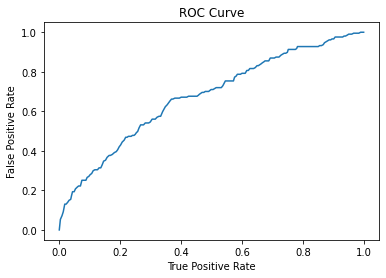

TestSet areaUnderROC: 0.6731071502833345


In [ ]:
testSet_2 = model_2.summary
roc_2 = testSet_2.roc.toPandas()
plt.plot(roc_2['FPR'],roc_2['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('TestSet areaUnderROC: ' + str(testSet_2.areaUnderROC))

## Model Building - (Model 3)

#### For Model 3 let us use GLM algorithm in statsmodel and check the significance of each of the independent variables. Here we will check which independent variable has a high chance of having their coefficient to be close to 0 (hence insignificant as per null hypothesis) and eliminate that.

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model. Taking columns from 2nd model
cols_2 = ['CODE_GENDER_ix',
        'FLAG_OWN_CAR_ix',
        'FLAG_OWN_REALTY_ix',
        'CNT_CHILDREN',
        'AMT_INCOME_TOTAL',
        'NAME_INCOME_TYPE_ix',
        'NAME_EDUCATION_TYPE_ix',
        'NAME_FAMILY_STATUS_ix',
        'NAME_HOUSING_TYPE_ix',
        'DAYS_EMPLOYED_ABS',
        'FLAG_WORK_PHONE',
        'FLAG_EMAIL',
        'OCCUPATION_TYPE_ix']
pd_train_model2 = df_train_model2.toPandas()
y_train_model2 = df_train_model2.select('DELINQUENT').toPandas()
logm1 = sm.GLM(y_train_model2,(sm.add_constant(pd_train_model2[cols_2])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             DELINQUENT   No. Observations:                12172
Model:                            GLM   Df Residuals:                    12158
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1029.3
Date:                Sun, 03 Jan 2021   Deviance:                       2058.5
Time:                        08:58:12   Pearson chi2:                 1.23e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.5932      0.301    -15.236      0.000      -5.184      -4.002
CODE_GENDER_ix             0.2375      0.158      1.503      0.133      -0.072       0.547
FLAG_OWN_CAR_ix            0.2721      0.152      1.791      0.073      -0.026       0.570
FLAG_OWN_REALTY_ix         0.4201      0.146      2.870      0.004       0.133       0.707
CNT_CHILDREN              -0.0738      0.104     -0.711      0.477      -0.277       0.130
AMT_INCOME_TOTAL        1.046e-06   1.63e-06      0.641      0.521   -2.15e-06    4.24e-06
NAME_INCOME_TYPE_ix       -0.0080      0.110     -0.072      0.942      -0.224       0.208
NAME_EDUCATION_TYPE_ix     0.2108      0.104      2.017      0.044       0.006       0.416
NAME_FAMILY_STATUS_ix      0.0793      0.068      1.171      0.242      -0.053       0.212
NAME_HOUSING_TYPE_ix       0.1431      0.077      1.861      0.063      -0.008       0.294
DAYS_EMPLOYED_ABS      -7.683e-05   3.59e-05     -2.140      0.032      -0.000   -6.46e-06
FLAG_WORK_PHONE            0.0957      0.156      0.614      0.539      -0.210       0.401
FLAG_EMAIL                -0.2095      0.273     -0.769      0.442      -0.744       0.325
OCCUPATION_TYPE_ix         0.0120      0.020      0.591      0.554      -0.028       0.052
==========================================================================================
"""

#### From the above statistics the below can be inferred.
 - There are multiple columns (listed below) which has high p value and also confidence interval containing 0.
  - CODE_GENDER
  - FLAG_OWN_CAR
  - CNT_CHILDREN
  - AMT_INCOME_TOTAL
  - NAME_INCOME_TYPE
  - NAME_FAMILY_STATUS
  - NAME_HOUSING_TYPE
  - FLAG_WORK_PHONE
  - FLAG_EMAIL
  - OCCUPATION_TYPE
 

 - We cannot remove everything from above since there are columns (give below) which are important from an business perspective.
  - AMT_INCOME_TOTAL
  - CODE_GENDER
  - NAME_INCOME_TYPE
  - OCCUPATION_TYPE
 - These columns might be used to pick customers. Hence these are needed. Let us remove some columns though and re-run the model.
 - Below are the columns we will be removing this time.
  - FLAG_OWN_CAR
  - CNT_CHILDREN
  - NAME_FAMILY_STATUS
  - NAME_HOUSING_TYPE
  - FLAG_WORK_PHONE
  - FLAG_EMAIL

In [ ]:
df_merged.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- DELINQUENT: integer (nullable = false)
 |-- DAYS_BIRTH_ABS: integer (nullable = true)
 |-- DAYS_EMPLOYED_ABS: integer (nullable = true)
 |-- NAME_INCOME_TYPE_ix: double (nullable = false)
 |-- NAME_EDUCATION_TYPE_ix: double (nullable = false)
 |-- NAME_FAMILY_STATUS_ix: double (nullable = false)
 |-- NAME_HOUSING_TYPE_ix: double (nullable = fa

In [ ]:
trainCols_model3 = ['NAME_INCOME_TYPE_ixEnc',
                    'NAME_EDUCATION_TYPE_ixEnc',
                    'CODE_GENDER_ixEnc',
                    'FLAG_OWN_REALTY_ixEnc',
                    'OCCUPATION_TYPE_ixEnc',
                    'AMT_INCOME_TOTAL',
                    'DAYS_EMPLOYED_ABS']

df_merged_model3 = df_merged.drop('features')
assembler_model3 = VectorAssembler(inputCols=trainCols_model3, outputCol='features')
df_merged_model3 = assembler_model3.transform(df_merged_model3)

In [ ]:
df_merged_model3.select('features').show()

+--------------------+
|            features|
+--------------------+
|(29,[1,4,8,10,27,...|
|(29,[0,4,10,27,28...|
|(29,[0,4,9,13,27,...|
|(29,[1,4,8,9,10,2...|
|(29,[0,4,8,9,18,2...|
|(29,[0,5,9,11,27,...|
|(29,[0,4,8,18,27,...|
|(29,[1,6,8,17,27,...|
|(29,[0,4,8,9,18,2...|
|(29,[0,4,8,9,11,2...|
|(29,[0,4,10,27,28...|
|(29,[0,4,14,27,28...|
|(29,[0,4,8,9,10,2...|
|(29,[1,4,8,9,21,2...|
|(29,[1,5,8,9,12,2...|
|(29,[0,4,8,9,11,2...|
|(29,[1,4,8,9,11,2...|
|(29,[0,4,8,9,17,2...|
|(29,[1,5,9,13,27,...|
|(29,[0,4,8,9,12,2...|
+--------------------+
only showing top 20 rows



In [ ]:
# Train test split
df_train_model3, df_test_model3 = df_merged_model3.randomSplit([0.7,0.3], 2018)

In [ ]:
# train model in the training dataset

# import the logistic model
from pyspark.ml.classification import LogisticRegression

# create the logistic model, configure it and call fit it to the data. 
# Set Threshold identified using KS Statistic
lr = LogisticRegression(featuresCol='features', labelCol='DELINQUENT')
lr.setThreshold(0.4373)
model_3 = lr.fit(df_train_model3)

## Model Evaluation (Model 3)

#### Recall

In [ ]:
# use the model to predict the class labels of test data. 

result_test_model3 = model_3.evaluate(df_test_model3)

result_test_model3.recallByLabel

[0.9998031883487503, 0.02]

#### Even after removing so many features the recall stays the same and has not gone down. Let us proceed with other metrics

#### Precision

In [ ]:
result_test_model3.precisionByLabel

[0.9810737736577829, 0.6666666666666666]

#### F1 score

In [ ]:
recall_for_delinquent_3 = result_test_model3.recallByLabel[1]
precision_for_delinquent_3 = result_test_model3.precisionByLabel[1]
f1score_3 = 2 * ((recall_for_delinquent_3 * precision_for_delinquent_3)/(recall_for_delinquent_3 + precision_for_delinquent_3))
f1score_3

0.038834951456310676

#### There is no descrease in F1 score which is good as we have eliminated many features

#### ROC Curve

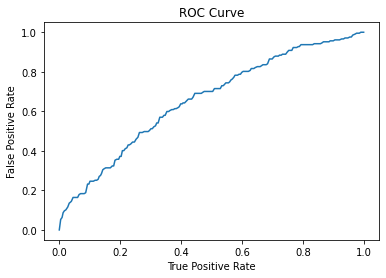

TestSet areaUnderROC: 0.6555121519891958


In [ ]:
testSet_3 = model_3.summary
roc_3 = testSet_3.roc.toPandas()
plt.plot(roc_3['FPR'],roc_3['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('TestSet areaUnderROC: ' + str(testSet_3.areaUnderROC))